In [1]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_data.drop('RowNumber', axis = 1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

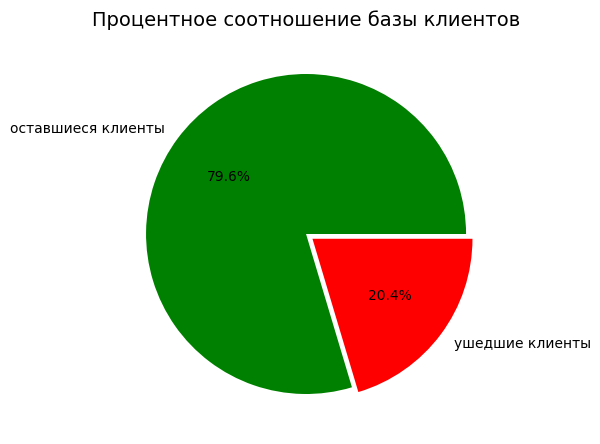

In [4]:
# 9.1 каково соотношение ушедших и лояльных клиентов

# посчитаем количество клиентов каждой категории
churn_data_clients = churn_data['Exited'].value_counts()

# построим круговую диаграмму распределения
fig = plt.figure( figsize = (4,4))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    churn_data_clients,
    explode = [0,0.05],
    labels = ['оставшиеся клиенты', 'ушедшие клиенты'],
    colors = ['green','red'],
    autopct = '%1.1f%%',
);

axes.set_title('Процентное соотношение базы клиентов', fontsize = 14);

из даиграммы видно, что ушедших клиентов меньше оставшихся

In [5]:
# 9.2 график распределения баланса пользователей, у которых на счету больше 2500 долларов

# выделим из общей информации ячейки с нужной
churn_balance = churn_data[churn_data['Balance'] > 2500].sort_values( by = 'Balance', ascending = True)

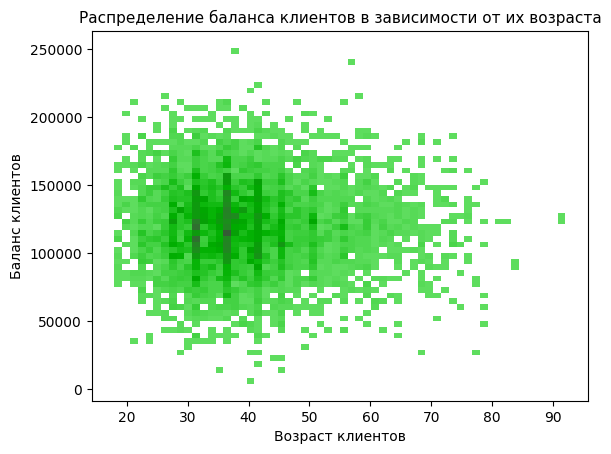

In [6]:
fig_hist_9_2 = sns.histplot(
    data = churn_balance,
    x = 'Age',
    y = 'Balance',
    color = 'green'
)

fig_hist_9_2.set_title('Распределение баланса клиентов в зависимости от их возраста', fontsize = 11)
fig_hist_9_2.set_xlabel('Возраст клиентов')
fig_hist_9_2.set_ylabel('Баланс клиентов');

исходя из распределения, большая часть пользователей с бадансом больше 2500$ находится в возрастынх пределах 30-50 лет

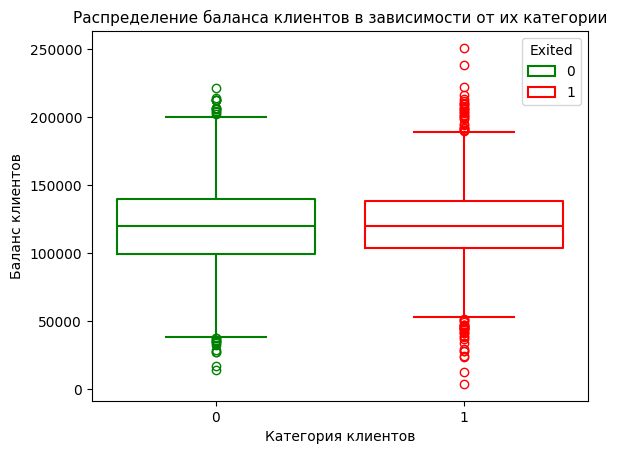

In [7]:
# 9.3 посмотреть на распределение баланса клиента в разрезе оттока

fig_hist_9_3 = sns.boxplot(
    data = churn_balance,
    x = 'Exited',
    y = 'Balance',
    hue = 'Exited',
    palette = ['green','red'],
    fill = False,
    log_scale = False
)

fig_hist_9_3.set_title('Распределение баланса клиентов в зависимости от их категории', fontsize = 11)
fig_hist_9_3.set_xlabel('Категория клиентов')
fig_hist_9_3.set_ylabel('Баланс клиентов');

средний баланс ушедших и оставшихся клиентов одинаковый. но у ушедших нижняя граница выше

возможная причина - неустраивающие условия хранения денежных средств

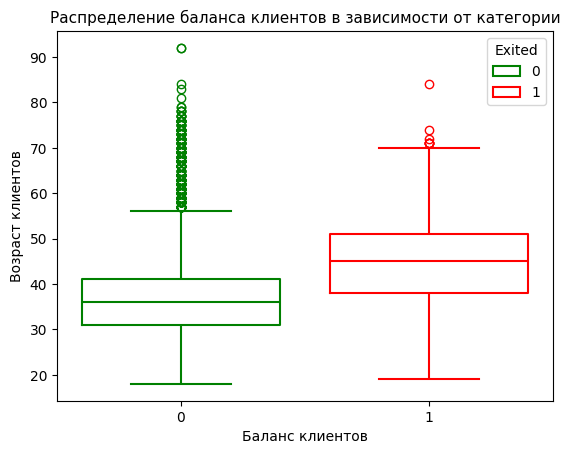

In [8]:
# 9.4 число ушедших клиентов в разрезе возрастра

fig_hist_9_4 = sns.boxplot(
    data = churn_balance,
    x = 'Exited',
    y = 'Age',
    palette = ['green','red'],
    hue = 'Exited',
    fill = False,
    log_scale = False
)

fig_hist_9_4.set_title('Распределение баланса клиентов в зависимости от категории', fontsize = 11)
fig_hist_9_4.set_xlabel('Баланс клиентов')
fig_hist_9_4.set_ylabel('Возраст клиентов');

большая часть ушедших клиентов находится в возрасте 45+

In [9]:
churn_data_gender = churn_data.groupby(['Gender'])['Exited'].value_counts()
churn_data_gender

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: count, dtype: int64

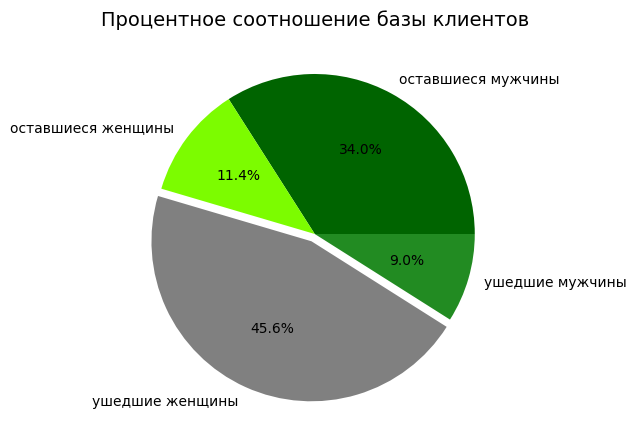

In [10]:
# 9.6 кто чаще уходит: мужчины или женщины

churn_data_gender = churn_data.groupby(['Gender'])['Exited'].value_counts()

# построим круговую диаграмму распределения
fig_9_6 = plt.figure( figsize = (4,4))
axes_9_6 = fig_9_6.add_axes([0,0,1,1])
axes_9_6.pie(
    churn_data_gender,
    explode = [0,0,0.05,0],
    labels = ['оставшиеся мужчины','оставшиеся женщины','ушедшие женщины','ушедшие мужчины'],
    autopct = '%1.1f%%',
    colors = ['darkgreen','lawngreen','gray','forestgreen']
);

axes_9_6.set_title('Процентное соотношение базы клиентов', fontsize = 14);

женщины чаще уходят

In [11]:
# 9.7 как отток клиентов зависит от числа приобретенных у банка услуг

exited = pd.DataFrame(churn_data['Exited'])
numofproducts = pd.DataFrame(churn_data['NumOfProducts'])
exited_numprod = pd.concat(
    [exited,numofproducts],
    axis = 1
)

exited_numprod = exited_numprod.groupby(['NumOfProducts'])['Exited'].value_counts()
exited_numprod

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              1          220
               0           46
4              1           60
Name: count, dtype: int64

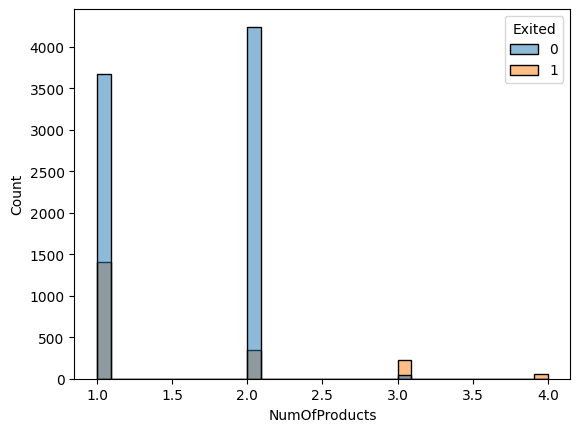

In [12]:
sns.histplot( data = churn_data, x = 'NumOfProducts', hue = 'Exited');

больше всего продуктов приобретено у ушедших клиентов

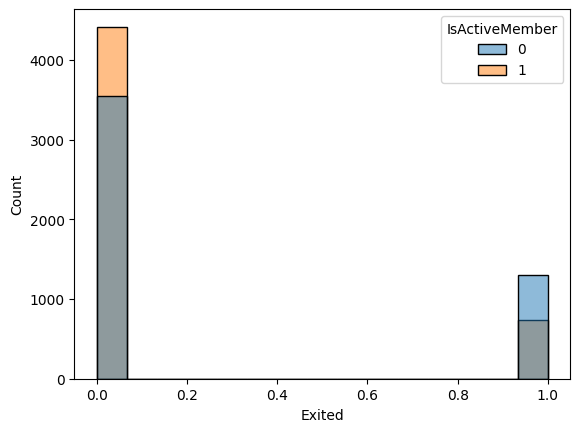

In [13]:
# 9.8 как влияет наличие статуса активного клиента на отток клиентов. предложения по улучшению

sns.histplot( data = churn_data, x = 'Exited', hue = 'IsActiveMember');

число активных клиентов уменьшается с уходом пользователя.

 предложения по улучшению: сделать продукты более доступными для катгории людей с низким балансом - в среднем это люди младше 30

In [14]:
churn_data.groupby(['Exited'])['IsActiveMember'].sum()

Exited
0    4416
1     735
Name: IsActiveMember, dtype: int64

In [15]:
# для задания 9.9 нужно посчитать долю ушедших клиентов для каждой страны

# создем сводную таблицу с долей ушедших клиентов для каждой страны
# посчитаем количество ушедших клиентов
exited_share = churn_data.groupby(by = ['Geography'])['Exited'].sum()
# считаем количество клиентов в странах
countries_clients = churn_data['Geography'].value_counts()
# делим количество клиентов на количество ушедших
exited_clients = exited_share / countries_clients
exited_clients = pd.DataFrame(exited_clients)
# и получаем нужное процентное соотношение
exited_clients = exited_clients.assign(Countries = ['France','Germany','Spain'])
display(exited_clients)

,0,Countries
Geography,,
France,0.161548,France
Germany,0.324432,Germany
Spain,0.166734,Spain


In [16]:
# 9.9
# в какой стране доля ушедших клиентов больше? построить на карте мира

#строим график
heatmap_9_9_1  = px.choropleth(
    data_frame = exited_clients, #датафрейм
    locations = 'Countries', #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой plotly
    color = 0, #от чего зависит цвет
    range_color = [0, 1],
    title = 'Доля ушедших клиентов компании', #заголовок
    width = 800, #ширина
    height = 500, #высота
    color_continuous_scale = 'Reds' #палитра цветов
)

#отображаем его
heatmap_9_9_1

больше всего ушедших клиентов в Германии

In [17]:
# 9.10
# перевести creditscore в категориальный признак

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [18]:
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)

In [19]:
# создание сводной таблицы 

pivot_table_9_10 = pd.pivot_table(
    data = churn_data,
    index = 'Tenure',
    columns = 'CreditScoreCat',
    values = 'Exited'
)

In [20]:
pivot_table_9_10

CreditScoreCat,Excellent,Fair,Good,Poor,Very_Poor
Tenure,,,,,
0,0.275000,0.217391,0.203822,0.226415,0.444444
1,0.208333,0.215596,0.203608,0.259398,0.253731
2,0.137255,0.213043,0.187342,0.211765,0.151515
3,0.168317,0.216450,0.205962,0.212245,0.285714
4,0.131868,0.197248,0.195122,0.233202,0.293103
5,0.233333,0.206897,0.214470,0.199153,0.149254
6,0.241379,0.236364,0.182857,0.179916,0.225352
7,0.127660,0.171103,0.191892,0.151261,0.206349
8,0.196078,0.209016,0.152355,0.214575,0.253521


In [21]:
# тепловая карта с аннотацией. какие киенты уходят чаще всего?

heatmap_9_10 = px.density_heatmap(
    data_frame = pivot_table_9_10,
    color_continuous_scale = ['green','red']
)

heatmap_9_10